In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
circuit = QuantumCircuit(2,1)

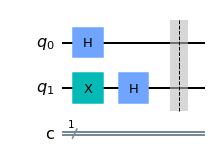

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()

circuit.draw(output="mpl")

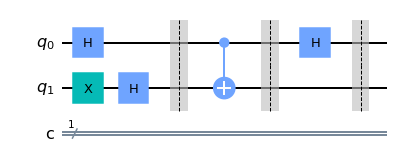

In [4]:
circuit.cx(0,1)
circuit.barrier()

circuit.h(0)
circuit.barrier()

circuit.draw(output="mpl")

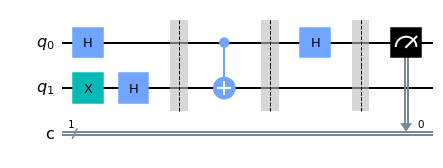

In [5]:
circuit.measure(0,0)
circuit.draw(output="mpl")

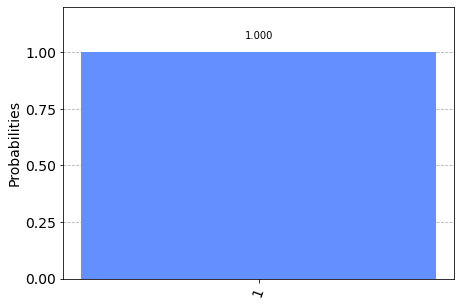

In [6]:
backend = Aer.get_backend("qasm_simulator")
result = execute(circuit,backend=backend,shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

# Real Quantum Computer

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider("ibm-q")

In [9]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 4 & simulated qubits
ibmq_lima : 52 & 5 qubits
ibmq_belem : 333 & 5 qubits
ibmq_quito : 35 & 5 qubits
simulator_statevector : 4 & simulated qubits
simulator_mps : 4 & simulated qubits
simulator_extended_stabilizer : 4 & simulated qubits
simulator_stabilizer : 4 & simulated qubits
ibmq_manila : 26 & 5 qubits
ibm_nairobi : 30 & 7 qubits
ibm_oslo : 65 & 7 qubits


In [10]:
quantum_computer = provider.get_backend("ibmq_quito")

In [11]:
quantum_result = execute(circuit,backend=quantum_computer,shots=1024).result()

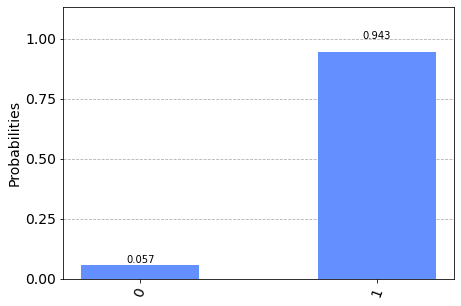

In [12]:
quantum_counts = quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])